# Part 1 ‐ Exploratory data analysis

In [1]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# import dataset
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
logins.dtypes

login_time    datetime64[ns]
dtype: object

In [6]:
# sort dataset
logins = logins.sort_values(by='login_time').reset_index(drop=True)
logins.head()

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37


In [7]:
# extract info
logins['login_month'] = logins.login_time.dt.month
logins['login_day'] = logins.login_time.dt.day

In [8]:
logins.head()

,login_time,login_month,login_day
0,1970-01-01 20:12:16,1,1
1,1970-01-01 20:13:18,1,1
2,1970-01-01 20:16:10,1,1
3,1970-01-01 20:16:36,1,1
4,1970-01-01 20:16:37,1,1


## 1.1 visualize login counts per day 

In [9]:
login_per_day = logins.groupby(['login_month', 'login_day']).count().rename({'login_time':'login_counts'}, axis=1)

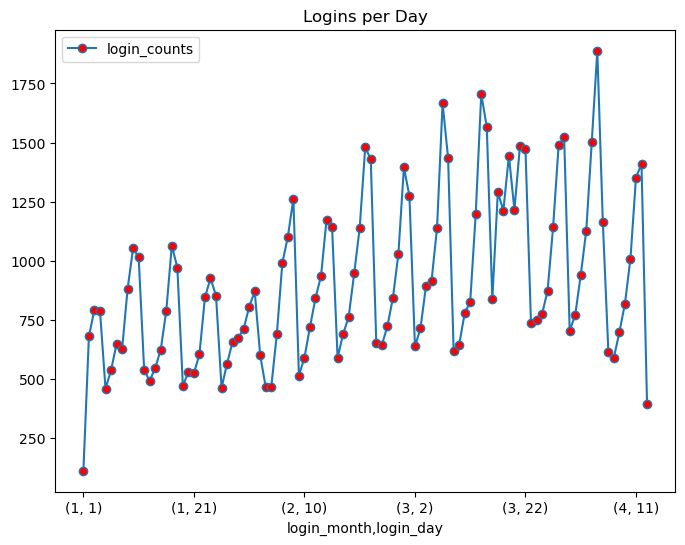

In [10]:
login_per_day.plot(kind='line', marker='o', markerfacecolor='red', figsize=(8,6))
plt.title('Logins per Day')
plt.show();

<font color=red> From day to day, the login counts increased with time.

In [11]:
print(f"this dataset totally have {len(login_per_day)} days")

this dataset totally have 103 days


one day has 96 intervals of 15mins. label from 0 to 95, interval 0 means from 00:00:00 to 00:15:00, interval 1 means from 00:15:00 to 00:30:00, and so on. 

In [12]:
# label intervals in each day
def calculate_intervals(row):
    midnight = row.replace(hour=0, minute=0, second=0, microsecond=0)
    minutes_from_midnight = (row - midnight).seconds // 60
    intervals_from_midnight = minutes_from_midnight // 15
    return intervals_from_midnight

In [13]:
# label intervals
logins['intervals'] = logins['login_time'].apply(calculate_intervals)

In [14]:
logins.head()

,login_time,login_month,login_day,intervals
0,1970-01-01 20:12:16,1,1,80
1,1970-01-01 20:13:18,1,1,80
2,1970-01-01 20:16:10,1,1,81
3,1970-01-01 20:16:36,1,1,81
4,1970-01-01 20:16:37,1,1,81


In [15]:
df = logins.groupby(['login_month', 'login_day', 'intervals']).count().rename({'login_time':'login_counts'}, axis=1)

In [16]:
df.head()

login_counts
login_month login_day intervals              
1           1         80                    2
                      81                    6
                      82                    9
                      83                    7
                      84                    1

## 1.2 visualize login counts per month, per day, per interval 

In [17]:
# separate by month
jan_df = df.loc[1]
feb_df = df.loc[2]
mar_df = df.loc[3]
apr_df = df.loc[4]

In [18]:
jan_pivot_table = jan_df.pivot_table(values='login_counts', 
                            index=['login_day'], 
                            columns='intervals')
feb_pivot_table = feb_df.pivot_table(values='login_counts', 
                            index=['login_day'], 
                            columns='intervals')
mar_pivot_table = mar_df.pivot_table(values='login_counts', 
                            index=['login_day'], 
                            columns='intervals')
apr_pivot_table = apr_df.pivot_table(values='login_counts', 
                            index=['login_day'], 
                            columns='intervals')

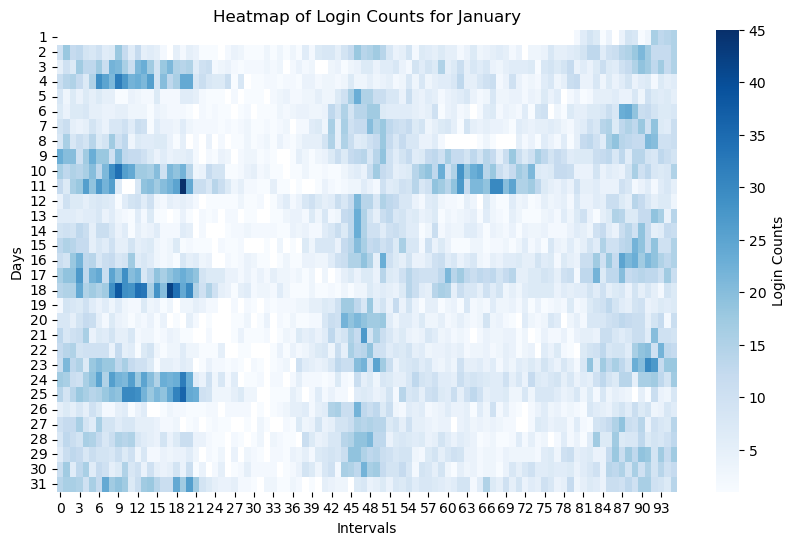

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(jan_pivot_table, cmap='Blues', cbar_kws={'label': 'Login Counts'})
plt.xlabel('Intervals')
plt.ylabel('Days')
plt.title('Heatmap of Login Counts for January')
plt.show()

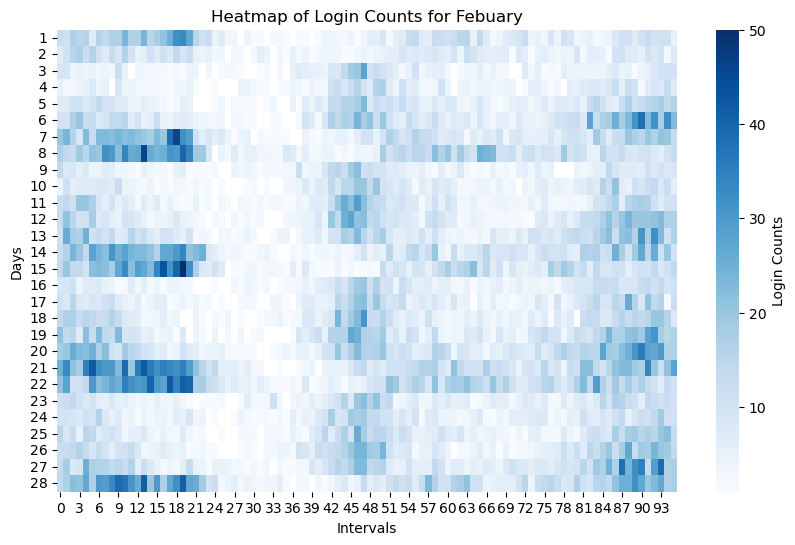

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(feb_pivot_table, cmap='Blues', cbar_kws={'label': 'Login Counts'})
plt.xlabel('Intervals')
plt.ylabel('Days')
plt.title('Heatmap of Login Counts for Febuary')
plt.show()

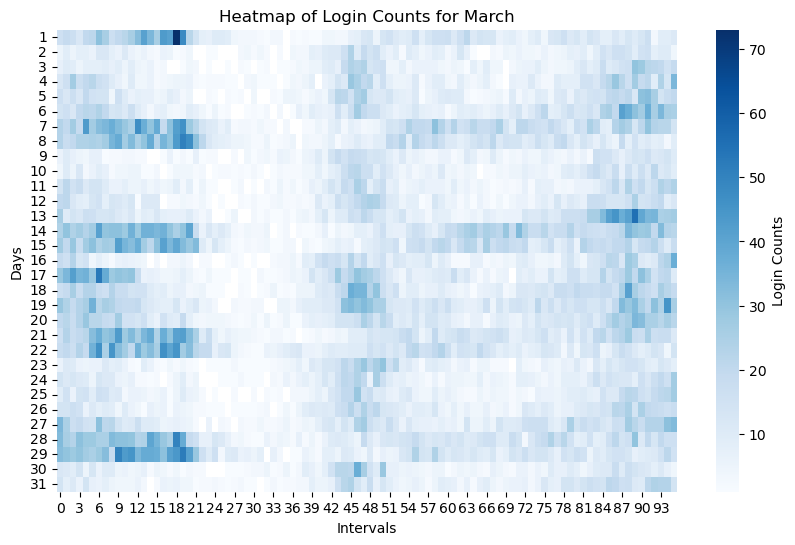

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(mar_pivot_table, cmap='Blues', cbar_kws={'label': 'Login Counts'})
plt.xlabel('Intervals')
plt.ylabel('Days')
plt.title('Heatmap of Login Counts for March')
plt.show()

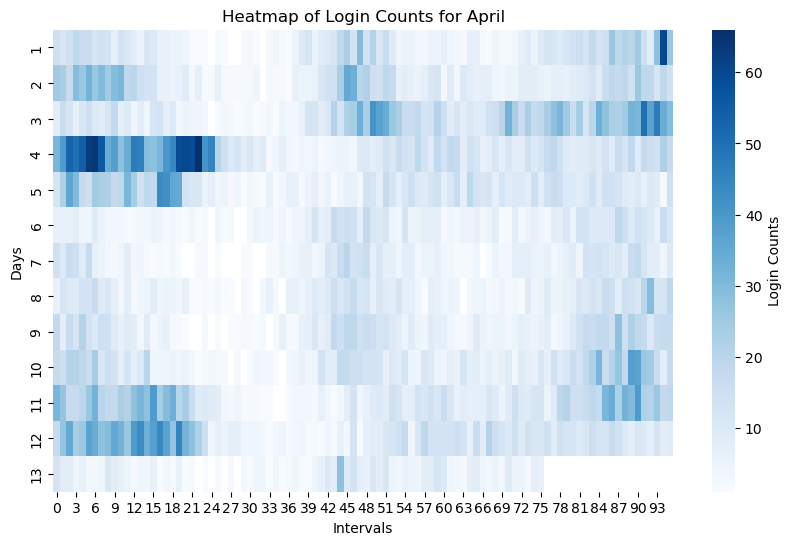

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(apr_pivot_table, cmap='Blues', cbar_kws={'label': 'Login Counts'})
plt.xlabel('Intervals')
plt.ylabel('Days')
plt.title('Heatmap of Login Counts for April')
plt.show()

<font color=red>The login_counts have obvious weekly cycle, is these more login_counts come from weekend? Let's check it.

In [23]:
# add weekday info
logins['day_in_week'] = logins['login_time'].dt.weekday

In [24]:
logins.head()

,login_time,login_month,login_day,intervals,day_in_week
0,1970-01-01 20:12:16,1,1,80,3
1,1970-01-01 20:13:18,1,1,80,3
2,1970-01-01 20:16:10,1,1,81,3
3,1970-01-01 20:16:36,1,1,81,3
4,1970-01-01 20:16:37,1,1,81,3


In [25]:
day_in_week = pd.DataFrame(logins.groupby(['login_month', 'day_in_week']).login_time.count()).\
rename({'login_time':'login_counts'}, axis=1).reset_index()

In [26]:
day_in_week.head()

,login_month,day_in_week,login_counts
0,1,0,1926
1,1,1,2124
2,1,2,2375
3,1,3,2640
4,1,4,3907


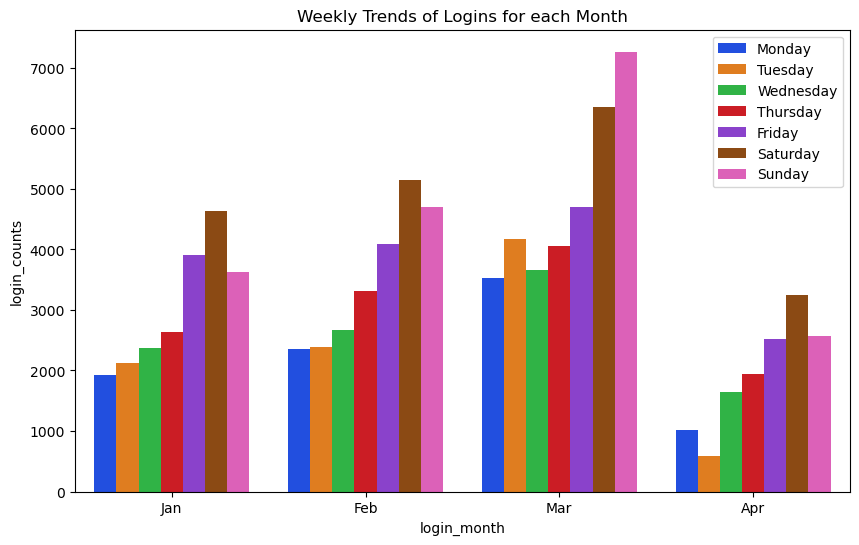

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=day_in_week.login_month, y=day_in_week.login_counts, hue=day_in_week.day_in_week, palette='bright')
plt.xticks(ticks=[0,1,2,3], labels=['Jan', 'Feb', 'Mar', 'Apr'])

handles, labels = plt.gca().get_legend_handles_labels()
legend_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.legend(handles, legend_labels)

plt.title('Weekly Trends of Logins for each Month')
plt.show()

## 1.3 summary

The login_counts increased with time from Jan to Apr, and fluctuate in a weekly cycle, in weekday, the logins mainly in intervals 42-51 (10:30pm-12:45pm) and 81-96(20:15pm-midnight), in weekend, the logins mainly in intervals 0-24 (midnight-6am), and logins in weenkend is more than weekday. especially March.

# Part 2 ‐ Experiment and metrics design

## 2.1 key measure of success:

The key measure of success of the reimbursement program could be the change in the number of cross-city trips made by drivers. 
This metric is important because it directly reflects the effectiveness of the reimbursement program in breaking the exclusivity trend caused by the toll bridge.          
An increase in cross-city trips would indicate that more drivers are willing to operate in both cities, which means we can claim success of the reimbursement program.         
No change in cross-city trips would indicate that drivers are still exclusive to each city, which means we can NOT claim success of the reimbursement program.       

## 2.2 practical experiment design:
   
### a) implementation of the experiment:      
toll period: before implementing the reimbursement program, collect data on the number of cross-city trips during a specific period (e.g., several months).         
reimbursement period: introduce the toll reimbursement program and track the number of cross-city trips during the same duration as the toll period.         
### b) Statistical Test(s):          
perform a two-sample hypothesis test (e.g., t-test) to compare the means of cross-city trips during the toll and reimbursement periods.            
Null Hypothesis (H0): There is no significant difference in the mean number of cross-city trips before and after the reimbursement program.          
Alternative Hypothesis (H1): The mean number of cross-city trips after the reimbursement program is significantly higher than before.
### c) interpretation of results and recommendations:         
#### results interpretation:
If the p-value is less than the significance level (e.g., 0.05), reject the null hypothesis. That means after the reimbursement program, the  mean number of cross-city trips  is significantly higher than before, i.e., the reimbursement program has a statistically significant impact on increasing cross-city trips.        
If the p-value is greater than the significance level, fail to reject the null hypothesis, i.e., the reimbursement program DOESN’T have a statistically significant impact on increasing cross-city trips.         
#### recommendations:  
It may take some time for drivers to adapt to the reimbursement program, so the experiment duration should be chosen carefully.
collect qualitative feedback from drivers to understand their experiences and perceptions regarding the reimbursement program.
#### caveats:
external factors: consider external factors that could influence driver behavior (e.g., seasonal changes, economic conditions, etc.).

# Part 3 ‐ Predictive modeling

## 3.1 data cleaning and EDA

### 3.1.1 data cleaning

In [28]:
# import dataset
riders = pd.read_json('ultimate_data_challenge.json')
riders.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [29]:
# check shape
riders.shape

(50000, 12)

In [30]:
# check NAN values
riders.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [31]:
# check dtypes
riders.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [32]:
# fillna
riders['avg_rating_of_driver'] = riders['avg_rating_of_driver'].fillna(riders['avg_rating_of_driver'].median())
riders['avg_rating_by_driver'] = riders['avg_rating_by_driver'].fillna(riders['avg_rating_by_driver'].median())
riders['phone'] = riders['phone'].fillna('unknown')

In [33]:
# change to datetime
riders['last_trip_date'] = pd.to_datetime(riders['last_trip_date'])

since we don't know the data collection date, use the most recent date in last_trip_date as data collection date.

In [34]:
from datetime import timedelta

In [35]:
# set the date 30 days before most recent last_trip_date as threshold date
thres_date = riders['last_trip_date'].max()-timedelta(days=30)

In [36]:
riders['retention'] = riders['last_trip_date'].apply(lambda x: x > thres_date)

In [37]:
riders.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


### 3.1.2 EDA

In [38]:
# class distribution
class_counts = riders['retention'].value_counts(normalize=True)
class_counts

retention
False    0.6338
True     0.3662
Name: proportion, dtype: float64

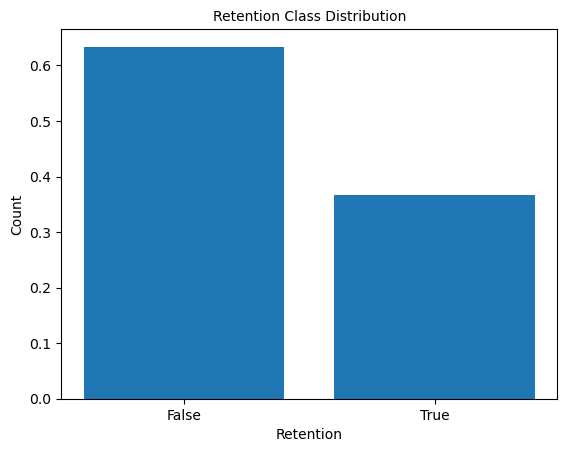

In [39]:
# plot class distribution
fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts)
ax.set_xticks([0, 1], labels=['False', 'True'])
ax.set_ylabel('Count')
ax.set_xlabel('Retention')
ax.set_title('Retention Class Distribution',
              fontsize = 10)
plt.show()

<font color=red> this dataset is slightly imblanced, we will try to predict first, if necessary may needs resmapling.

In [40]:
print(f"There are {class_counts.loc[True]*100:.2f}% users are retained in total {riders.shape[0]} users")

There are 36.62% users are retained in total 50000 users


In [41]:
# two classes description
riders.groupby('retention').describe().T

retention                                             False  \
trips_in_first_30_days count                        31690.0   
                       mean                        1.659167   
                       min                              0.0   
                       25%                              0.0   
                       50%                              1.0   
                       75%                              2.0   
                       max                             73.0   
                       std                         2.661903   
avg_rating_of_driver   count                        31690.0   
                       mean                        4.667611   
                       min                              1.0   
                       25%                              4.5   
                       50%                              4.9   
                       75%                              5.0   
                       max                              5.0   
                       std                         0.603863   
avg_surge              count                        31690.0   
                       mean                        1.075367   
                       min                              1.0   
                       25%                              1.0   
                       50%                              1.0   
                       75%                              1.0   
                       max                              8.0   
                       std                         0.250219   
last_trip_date         count                          31690   
                       mean   2014-03-14 04:01:28.153991936   
                       min              2014-01-01 00:00:00   
                       25%              2014-01-26 00:00:00   
                       50%              2014-03-10 00:00:00   
                       75%              2014-05-01 00:00:00   
                       max              2014-06-01 00:00:00   
                       std                              NaN   
surge_pct              count                        31690.0   
                       mean                        8.688548   
                       min                              0.0   
                       25%                              0.0   
                       50%                              0.0   
                       75%                              0.0   
                       max                            100.0   
                       std                        22.132211   
weekday_pct            count                        31690.0   
                       mean                       60.181597   
                       min                              0.0   
                       25%                             16.7   
                       50%                             66.7   
                       75%                            100.0   
                       max                            100.0   
                       std                        40.985698   
avg_dist               count                        31690.0   
                       mean                        6.188478   
                       min                              0.0   
                       25%                             2.32   
                       50%                             4.03   
                       75%                             7.77   
                       max                           129.89   
                       std                         6.213027   
avg_rating_by_driver   count                        31690.0   
                       mean                        4.787999   
                       min                              1.0   
                       25%                              4.8   
                       50%                              5.0   
                       75%                              5.0   
                       max     

#### 3.1.2.1 pairplot

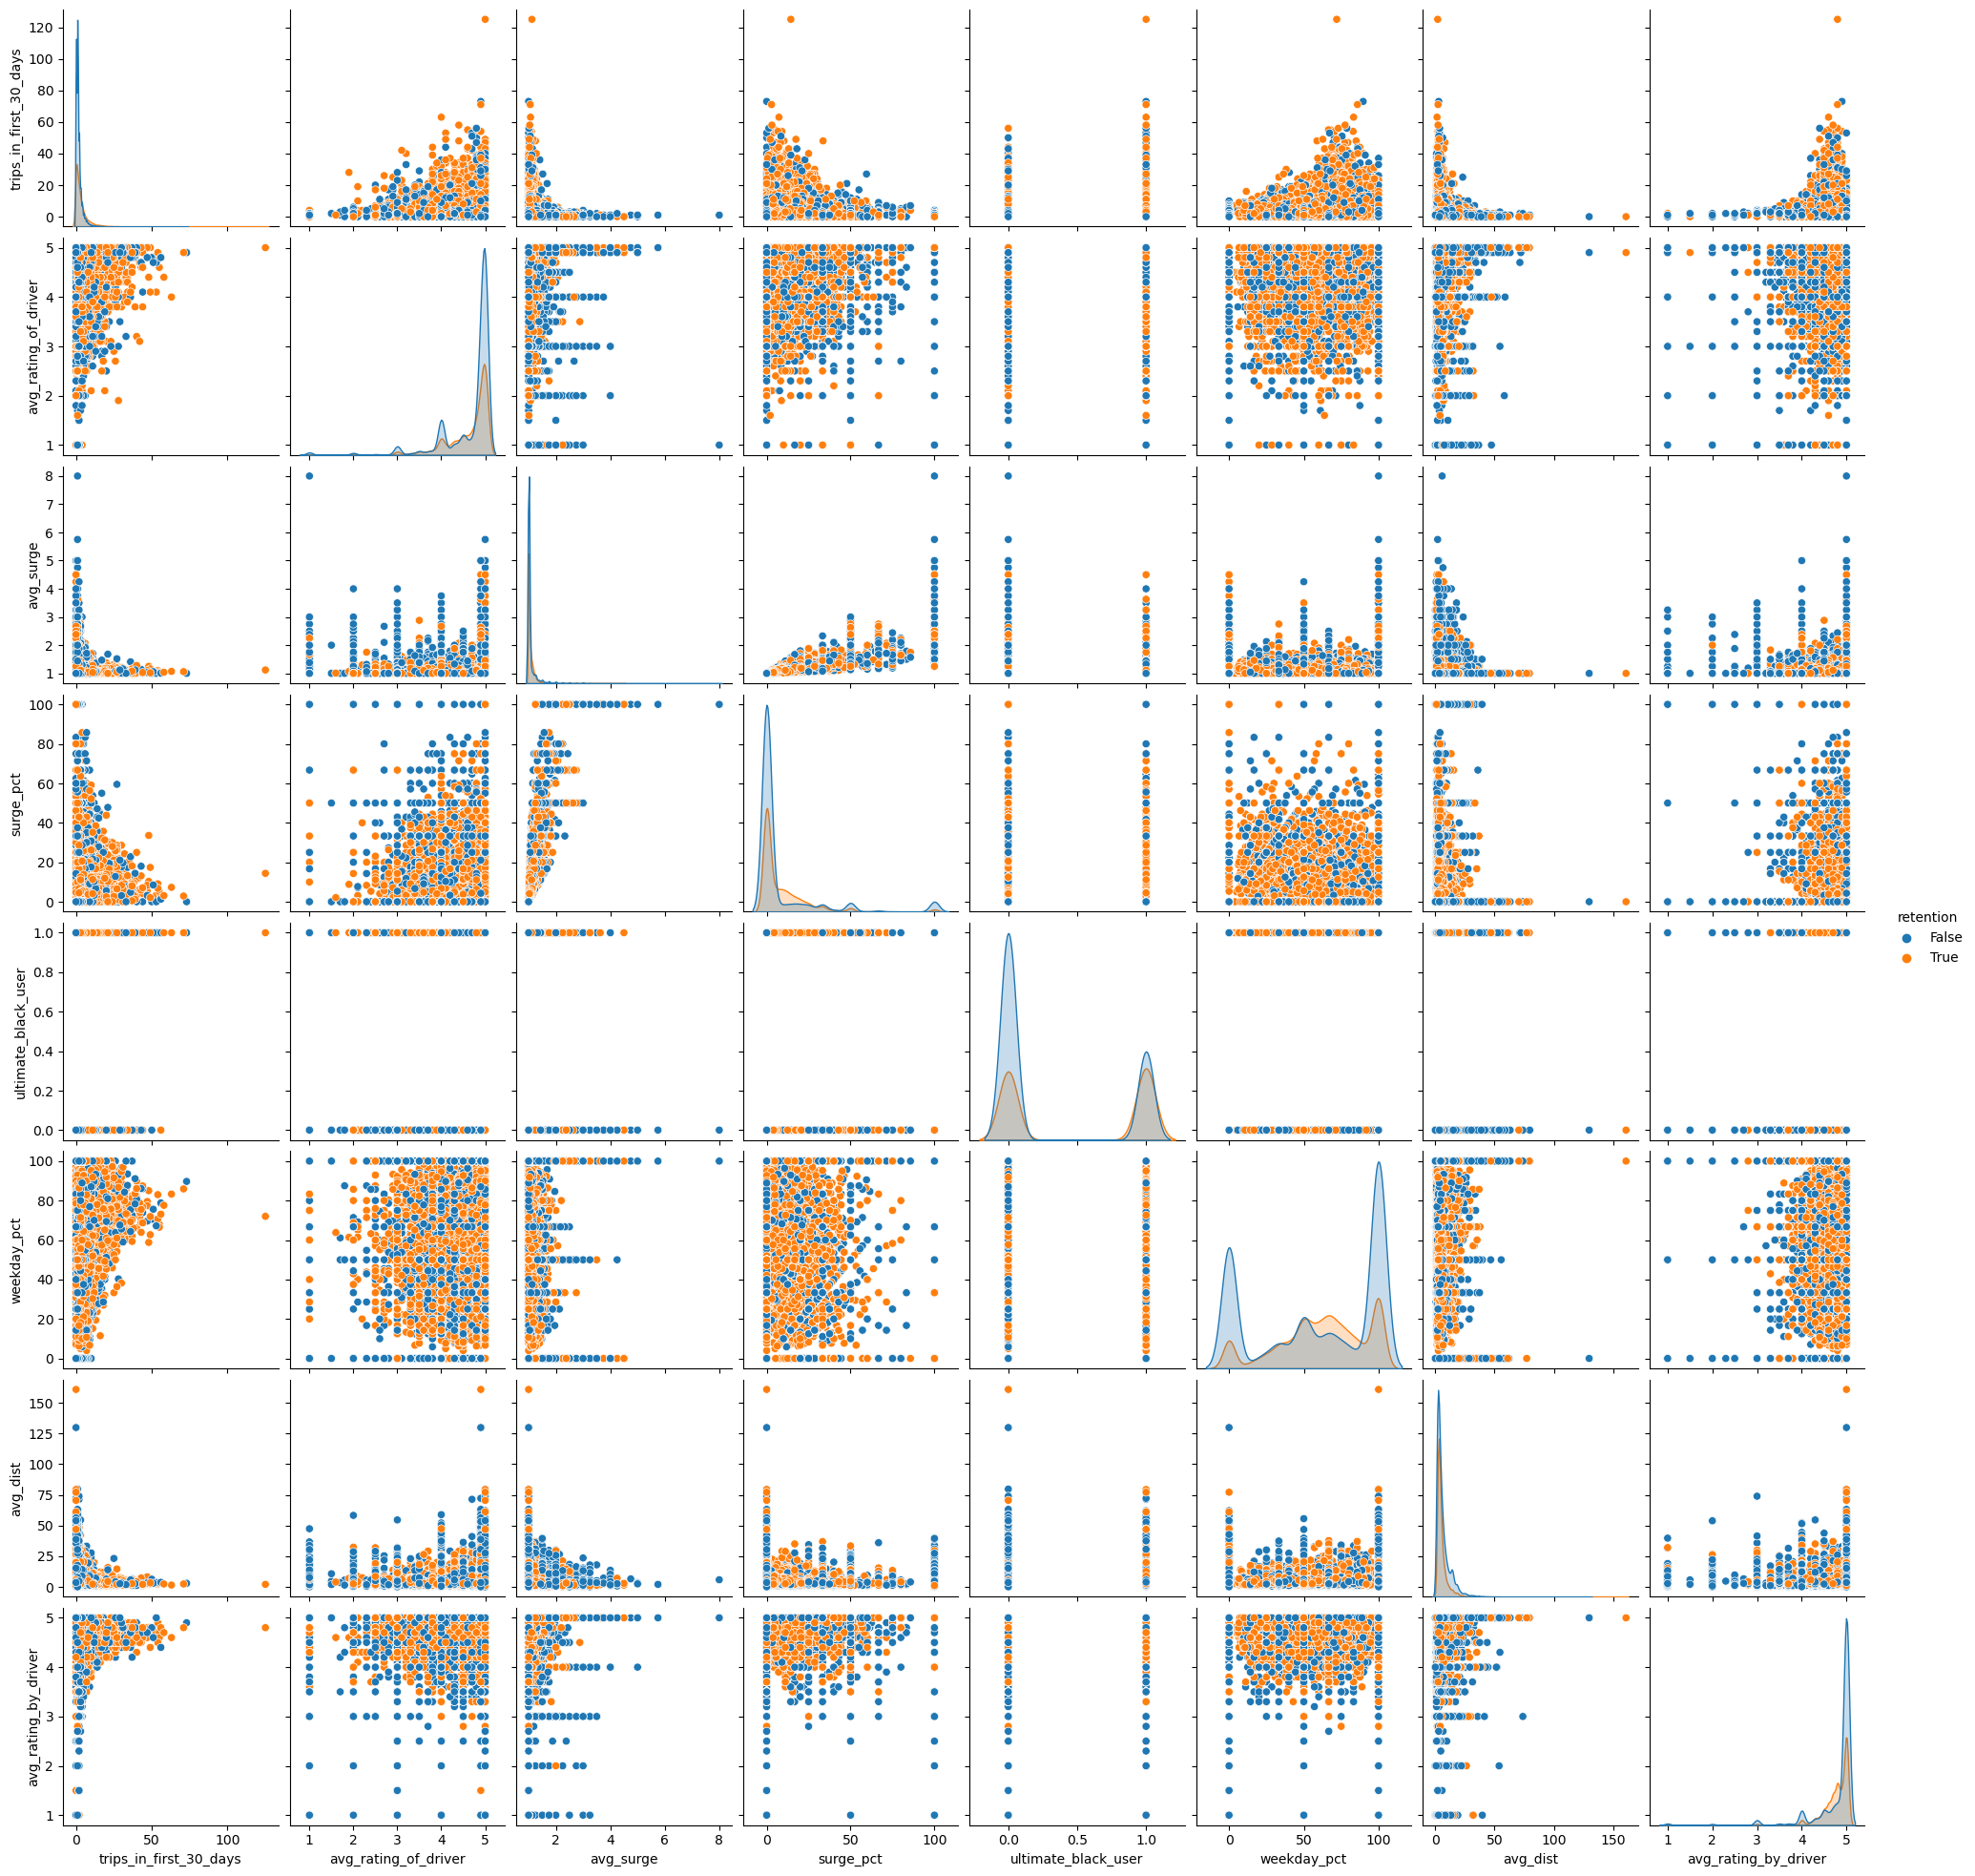

In [70]:
# pairplot
sns.pairplot(data=riders, hue='retention');

1. no obvious boundary between retention true and retention true on scatterplots.
2. the ratio of ultimate_black_user looks very similar to ratio of retention. are these two correlated?
3. more trips_in_first_30_days, higher avg_rating_of_driver, higher avg_rating_by_driver, higher weekday_pct, lower surge_pct
4. more avg_surge, higher surge_pct, higher avg_rating_of_driver, higher avg_rating_by_driver.
5. are avg_rating_of_driver and avg_rating_by_driver correlated?

#### 3.1.2.2 heatmap

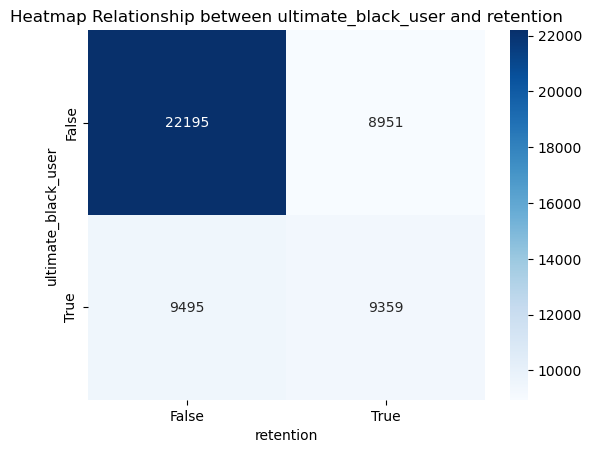

In [94]:
contingency_table = pd.crosstab(riders['ultimate_black_user'], riders['retention'])
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Heatmap Relationship between ultimate_black_user and retention')
plt.show()

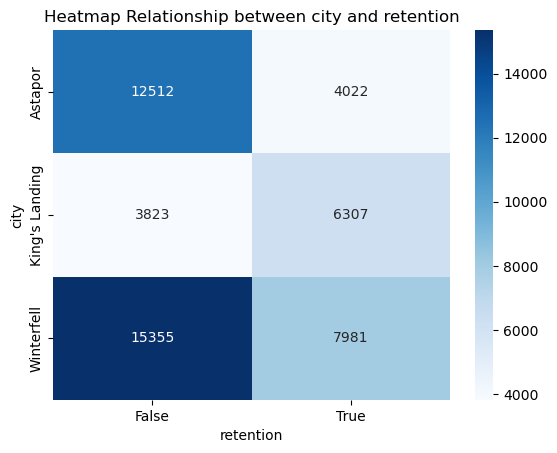

In [95]:
contingency_table = pd.crosstab(riders['city'], riders['retention'])
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Heatmap Relationship between city and retention')
plt.show()

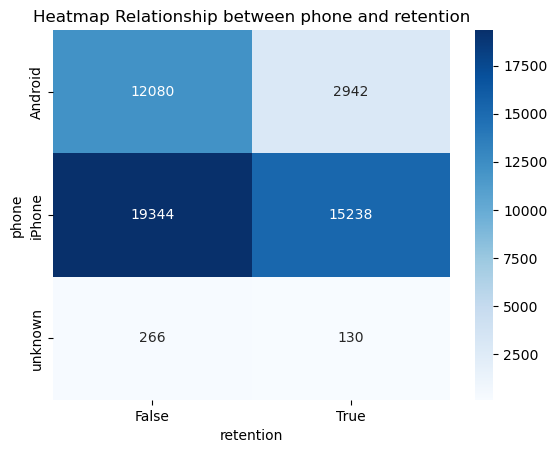

In [96]:
contingency_table = pd.crosstab(riders['phone'], riders['retention'])
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Heatmap Relationship between phone and retention')
plt.show()

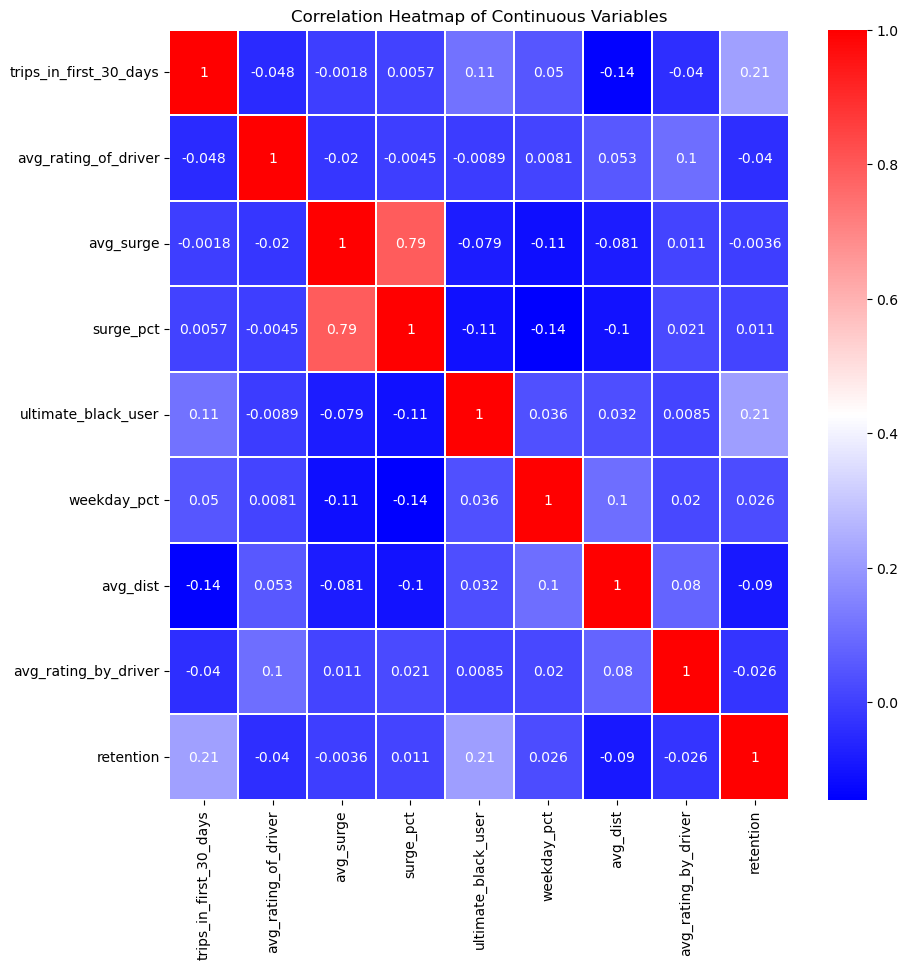

In [97]:
plt.figure(figsize=(10,10))
sns.heatmap(riders.corr(numeric_only=True), annot=True, cmap="bwr", linewidths=0.05, annot_kws={"fontsize":10})
_ = plt.title('Correlation Heatmap of Continuous Variables')

#### 3.1.2.3 boxplot

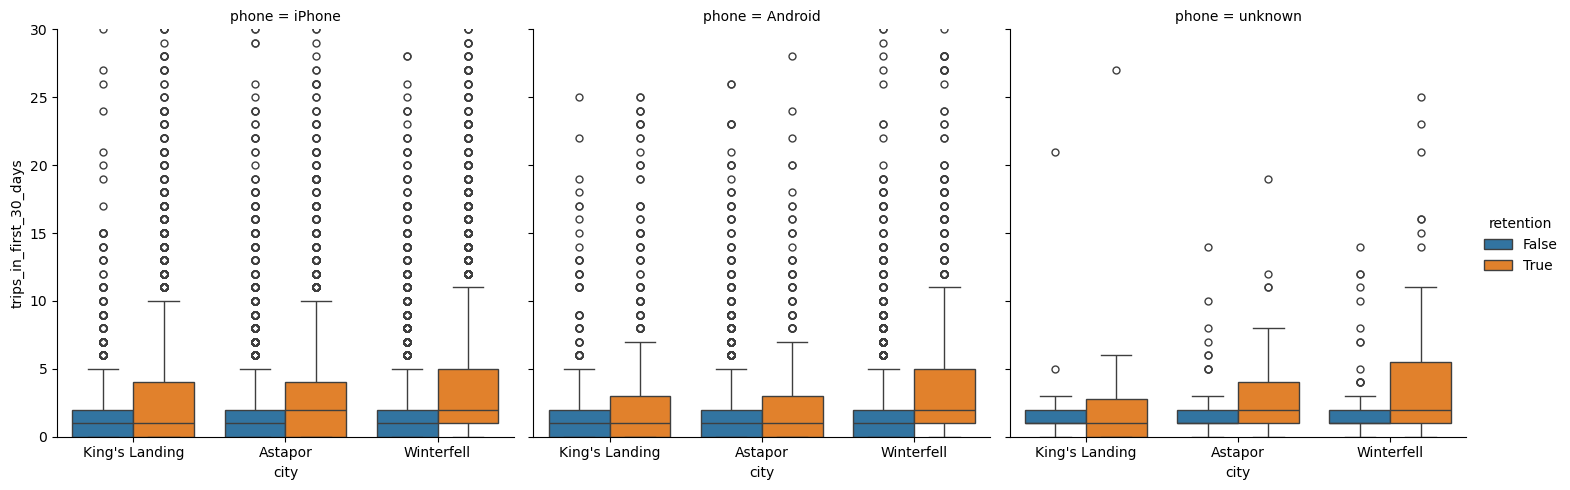

In [98]:
sns.catplot(x='city', y='trips_in_first_30_days', data=riders, hue='retention', col='phone', kind='box')
plt.ylim((0,30))
plt.show()

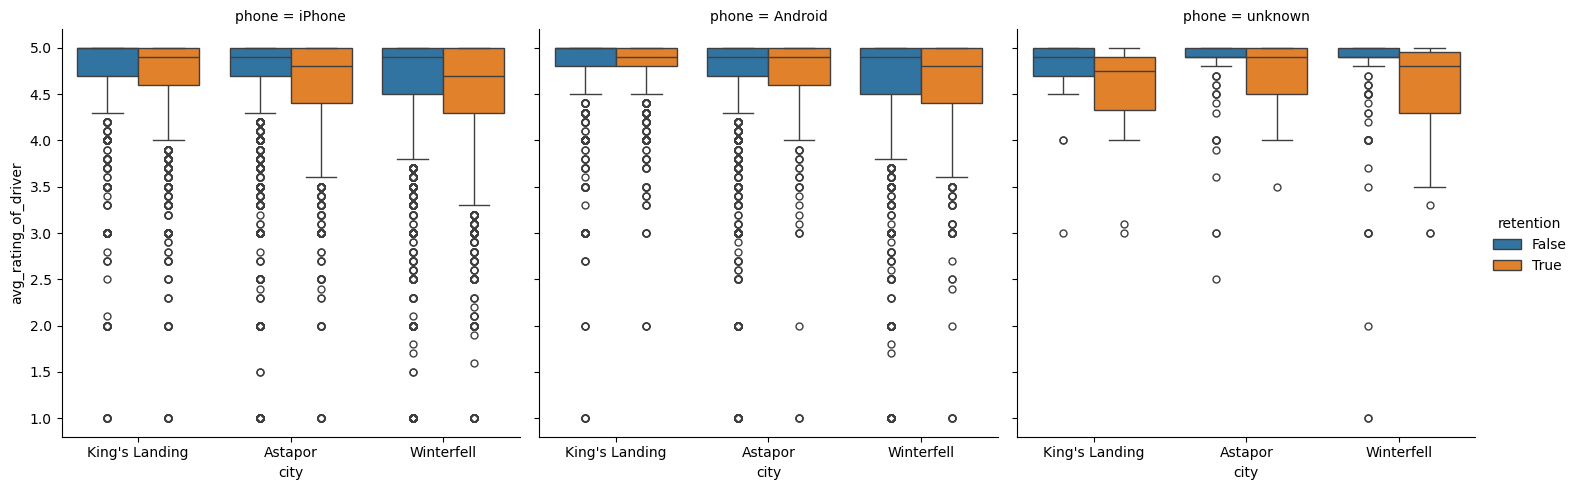

In [99]:
sns.catplot(x='city', y='avg_rating_of_driver', data=riders, hue='retention', col='phone', kind='box')
plt.show()

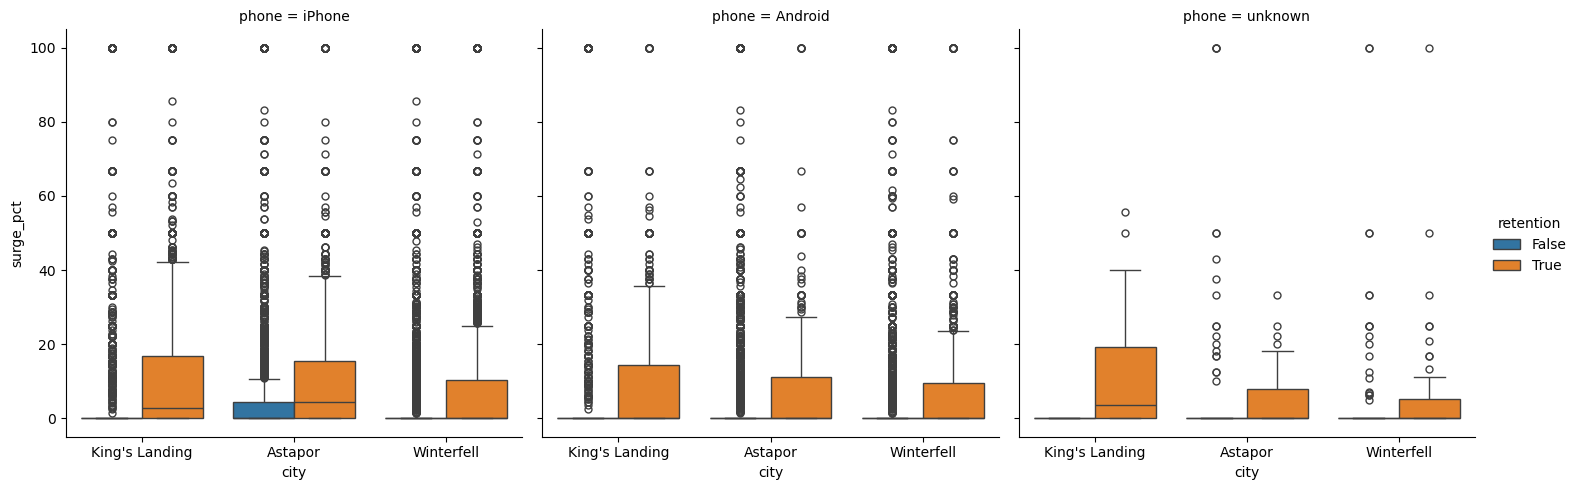

In [100]:
sns.catplot(x='city', y='surge_pct', data=riders, hue='retention', col='phone', kind='box')
plt.show()

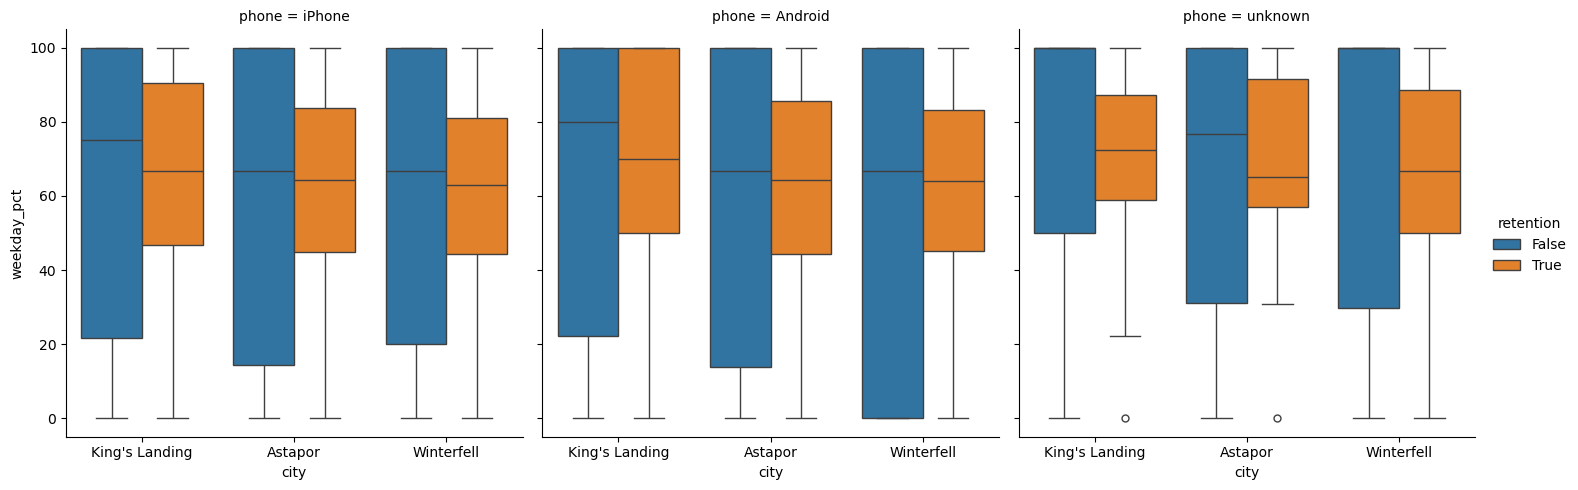

In [101]:
sns.catplot(x='city', y='weekday_pct', data=riders, hue='retention', col='phone', kind='box')
plt.show()

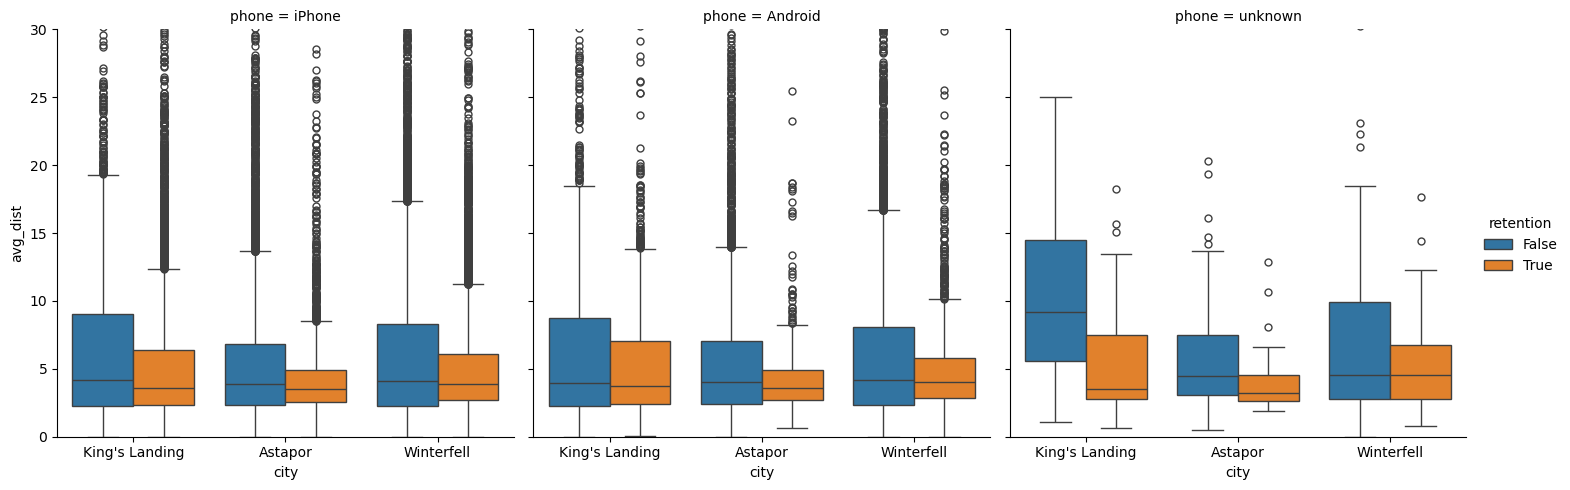

In [102]:
sns.catplot(x='city', y='avg_dist', data=riders, hue='retention', col='phone', kind='box')
plt.ylim((0, 30))
plt.show()

## 3.2 Modeling

In a binary classification, I choose a combination of logistic regression, random forest, gradient boost, and XGBoost.     
Logistic regression is a straightforward and interpretable method suitable for capturing linear relationships.       
Random forest can handle non-linearity well.        
Gradient boosting and XGBoost, being ensemble methods, excel in capturing complex relationships and achieving high predictive accuracy.

Alternative models considered included support vector machines (SVMs) and k-Nearest Neighbors (k-NN).      
SVMs were excluded due to their sensitivity to the choice of hyperparameters and potential scalability issues.     
k-NN, while simple, might not perform optimally in high-dimensional spaces.

Concerns revolve around potential overfitting in complex models like gradient boost and XGBoost.     
Model validation through techniques such as cross-validation, and evaluation metrics such as accuracy, precision, recall, and ROC curve, will be crucial to assess the model's generalization performance.

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, ConfusionMatrixDisplay, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

### 3.2.1 logistic regression

In [43]:
X = riders.drop(['retention', 'last_trip_date'], axis=1)
y = riders.retention

In [44]:
X = pd.get_dummies(X)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [46]:
X_train.shape, X_test.shape

((35000, 45), (15000, 45))

In [47]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_train_pred = logr.predict(X_train)
y_test_pred = logr.predict(X_test)

In [49]:
print(f'Accuracy on training data: {accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy on test data: {accuracy_score(y_test, y_test_pred)}')
print(f'roc_auc_score on training data: {roc_auc_score(y_train, y_train_pred)}')
print(f'roc_auc_score on test data: {roc_auc_score(y_test, y_test_pred)}')

Accuracy on training data: 0.7251142857142857
Accuracy on test data: 0.7259333333333333
roc_auc_score on training data: 0.6768744636030273
roc_auc_score on test data: 0.6774492301139803


In [50]:
print("Classification Report for Test Data")
print(classification_report(y_test, y_test_pred))

Classification Report for Test Data
              precision    recall  f1-score   support

       False       0.75      0.86      0.80      9507
        True       0.67      0.50      0.57      5493

    accuracy                           0.73     15000
   macro avg       0.71      0.68      0.68     15000
weighted avg       0.72      0.73      0.72     15000



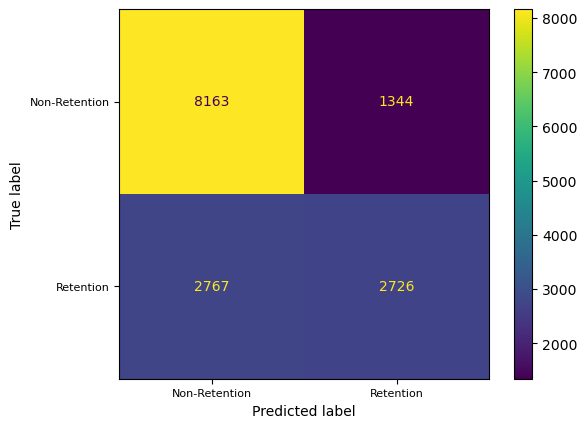

In [51]:
cm = confusion_matrix(y_test, y_test_pred, labels = logr.classes_)
fig, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Non-Retention', 'Retention'])

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Non-Retention', 'Retention'], fontsize = 8)
ax.set_yticklabels(labels = ['Non-Retention', 'Retention'], fontsize = 8)

display_cm.plot(ax = ax)
plt.show()

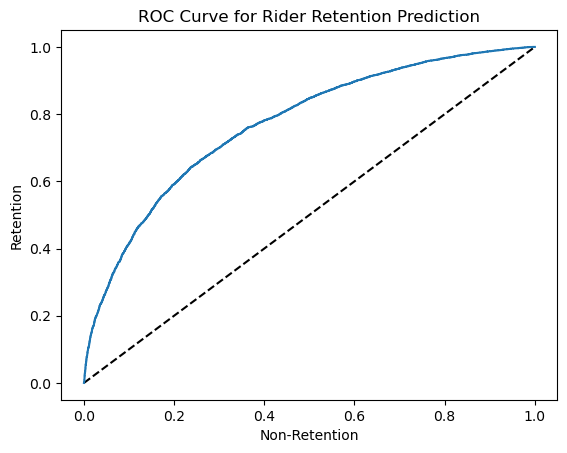

In [52]:
y_test_probs = logr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('Non-Retention')
plt.ylabel('Retention')
plt.title('ROC Curve for Rider Retention Prediction')
plt.show()

### 3.2.2 random forest 

In [91]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [92]:
cross_val_score(estimator=rf, X=X_train, y=y_train, cv=5, scoring='accuracy')

array([0.78342857, 0.77885714, 0.78028571, 0.78885714, 0.78742857])

In [93]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [94]:
print(f'Accuracy on training data: {accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy on test data: {accuracy_score(y_test, y_test_pred)}')
print(f'roc_auc_score on training data: {roc_auc_score(y_train, y_train_pred)}')
print(f'roc_auc_score on test data: {roc_auc_score(y_test, y_test_pred)}')

Accuracy on training data: 0.8064857142857143
Accuracy on test data: 0.7835333333333333
roc_auc_score on training data: 0.7712424649604859
roc_auc_score on test data: 0.746333021912567


In [95]:
print("Classification Report for Test Data")
print(classification_report(y_test, y_test_pred))

Classification Report for Test Data
              precision    recall  f1-score   support

       False       0.80      0.89      0.84      9507
        True       0.75      0.61      0.67      5493

    accuracy                           0.78     15000
   macro avg       0.77      0.75      0.76     15000
weighted avg       0.78      0.78      0.78     15000



### 3.2.3 gradient boost

In [96]:
gb = GradientBoostingClassifier(n_estimators=100, max_depth=10, random_state=42, learning_rate=0.02, max_features='sqrt')

In [97]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=10,
                           max_features='sqrt', random_state=42)

In [98]:
cross_val_score(estimator=gb, X=X_train, y=y_train, cv=5, scoring='accuracy')

array([0.78971429, 0.78328571, 0.782     , 0.791     , 0.786     ])

In [99]:
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

In [100]:
print(f'Accuracy on training data: {accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy on test data: {accuracy_score(y_test, y_test_pred)}')
print(f'roc_auc_score on training data: {roc_auc_score(y_train, y_train_pred)}')
print(f'roc_auc_score on test data: {roc_auc_score(y_test, y_test_pred)}')

Accuracy on training data: 0.8304
Accuracy on test data: 0.7868666666666667
roc_auc_score on training data: 0.7990354942612432
roc_auc_score on test data: 0.7509227010687517


In [101]:
print("Classification Report for Test Data")
print(classification_report(y_test, y_test_pred))

Classification Report for Test Data
              precision    recall  f1-score   support

       False       0.80      0.89      0.84      9507
        True       0.76      0.62      0.68      5493

    accuracy                           0.79     15000
   macro avg       0.78      0.75      0.76     15000
weighted avg       0.78      0.79      0.78     15000



### 3.2.4 xgboost

In [53]:
from xgboost import XGBClassifier

In [54]:
xgb = XGBClassifier(random_state=42)

In [55]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [56]:
cross_val_score(estimator=xgb, X=X_train, y=y_train, cv=5, scoring='accuracy')

array([0.789     , 0.786     , 0.78671429, 0.79171429, 0.79242857])

hyperparameter tunning

In [106]:
param_grid = {'learning_rate':[0.05, 0.1, 0.15, 0.2, 0.25, 0.3]}
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, verbose=2, n_jobs=-1, cv=5)

In [107]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]},
             verbose=2)

In [108]:
grid.best_params_

{'learning_rate': 0.1}

In [57]:
xgb_2 = XGBClassifier(n_estimators=100, random_state=42, learning_rate=0.1)

In [58]:
cross_val_score(estimator=xgb_2, X=X_train, y=y_train, cv=5, scoring='accuracy')

array([0.79742857, 0.79142857, 0.79014286, 0.79614286, 0.79571429])

In [59]:
xgb_2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [60]:
y_train_pred = xgb_2.predict(X_train)
y_test_pred = xgb_2.predict(X_test)

In [61]:
print(f'Accuracy on training data: {accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy on test data: {accuracy_score(y_test, y_test_pred)}')
print(f'roc_auc_score on training data: {roc_auc_score(y_train, y_train_pred)}')
print(f'roc_auc_score on test data: {roc_auc_score(y_test, y_test_pred)}')

Accuracy on training data: 0.8182857142857143
Accuracy on test data: 0.7932666666666667
roc_auc_score on training data: 0.7936457656611544
roc_auc_score on test data: 0.7663482833109778


In [62]:
print("Classification Report for Test Data")
print(classification_report(y_test, y_test_pred))

Classification Report for Test Data
              precision    recall  f1-score   support

       False       0.82      0.87      0.84      9507
        True       0.74      0.67      0.70      5493

    accuracy                           0.79     15000
   macro avg       0.78      0.77      0.77     15000
weighted avg       0.79      0.79      0.79     15000



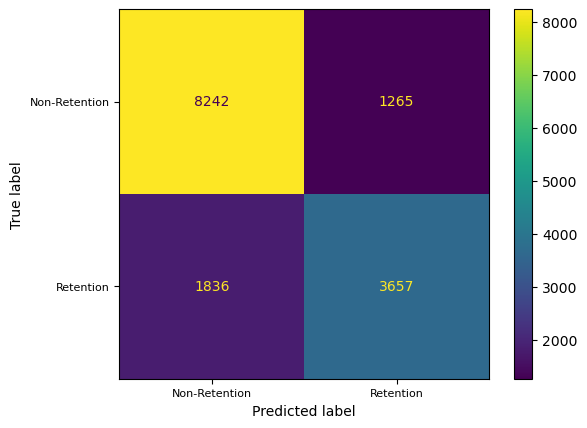

In [63]:
cm = confusion_matrix(y_test, y_test_pred, labels = xgb_2.classes_)
fig, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Non-Retention', 'Retention'])

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Non-Retention', 'Retention'], fontsize = 8)
ax.set_yticklabels(labels = ['Non-Retention', 'Retention'], fontsize = 8)

display_cm.plot(ax = ax)
plt.show()

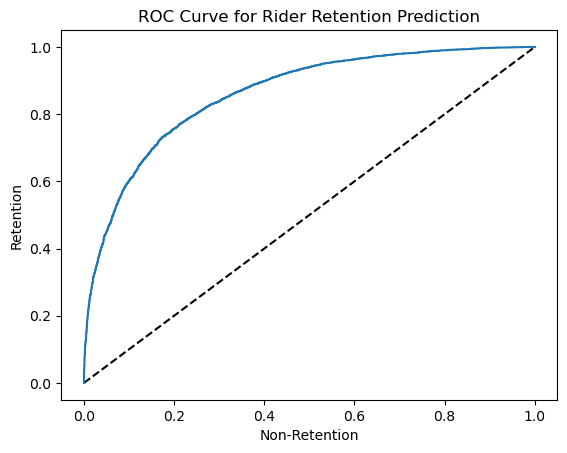

In [64]:
y_test_probs = xgb_2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('Non-Retention')
plt.ylabel('Retention')
plt.title('ROC Curve for Rider Retention Prediction')
plt.show()

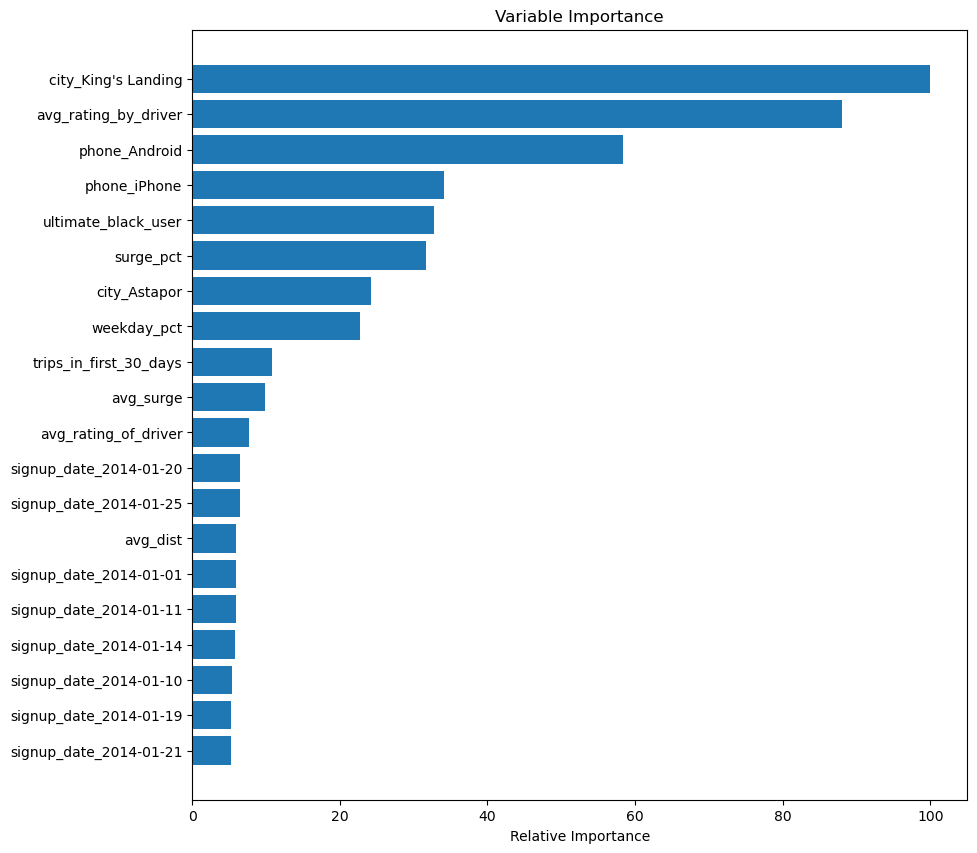

In [71]:
feature_importance = xgb_2.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[-20:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## 3.3 summary and suggestion

xgboost is best model selected, the first five important features are city_King's Landing, phone_iPhone, phone_Android, avg_rating_by_driver, ultimate_black_user, surge_pct, and city_Astapor. 

Ultimate can leverage the insights gained from the model to enhance long-term rider retention by implementing targeted strategies.

By understanding the key factors influencing rider retention, such as average rating of driver by rider, if the user took an Ultimate Black, the percent of trips taken with surge multiplier > 1 etc. For example, Ultimate can improve their drivers performance, tailor promotions for Ultimate Black program, give discounts to surge riders etc.

Ultimate can apply different strategy to cater to individual preferences in different cities. In different cities, the strategy should be different.